# Modello Terremoti

segue le regole del modello 1-D della sandpile

out_file = open("name_file.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,array[iterate]))

out_file.close()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N=64 # dimensione del reticolo (bidimensionale)
f_thresh=1. #soglia della forza
delta_f=1.e-4 #ampiezza della forza
alpha=0.15 #parametro di conservazione
n_iter=3000000 #numero iterazioni

dx=np.array([-1,0,1,0])  #array x
dy=np.array([0,-1,0,1])   #array y : servono per definire i vicini 
force=np.zeros([N+2,N+2])
toppling=np.zeros(n_iter,dtype="int")#rovesciamento serie temporale 
forcediss=np.zeros(n_iter)
totalf=np.zeros(n_iter,dtype="int") #forza totale serie temporale

for i in range(1,N+1):
    for j in range(1,N+1):
        force[i,j]=f_thresh*(np.random.uniform())

In [5]:
f_thresh/delta_f

50000.0

In [3]:
for iterate in range(0,n_iter): #iterazioni
    move=np.zeros([N+2,N+2])  #reset ogni volta, cornice vuota attorno al reticolo per evitare errori out of bound durante la redistibuzione
    #scansione reticolare per indicare quali nodi devono essere ridistribuiti e azzerati
   
    for i in range(1,N+1):
        for j in range(1,N+1):
            if force[i,j]>=f_thresh: # se vero il nodo è instabile
                move[i,j]-=force[i,j] #equazione resettare
                move[i+dx[:],j+dy[:]]+=alpha*force[i,j] #equazione sostituire
                toppling[iterate]+=1 #toppling cumulato 
                forcediss[iterate]+=(1-4*alpha)*force[i,j]
                
    if toppling[iterate]>0: #se positiva allora inizia il terremoto
        force+=move #reticolo aggiornato
    else: #nnt valanghe
        force[:,:]+=delta_f #equazione 
        
    totalf[iterate]=force.sum()
   # print totalf[iterate]#forza totale su reticolo
    if iterate%10000==0: #stampa
        print iterate
        #print("{0},toppl {1}.".format(iterate,toppling[iterate]))


0
10000
20000
30000
40000


KeyboardInterrupt: 

In [ ]:
plt.subplot(3,1,1)
plt.plot(range(0,n_iter),totalf)
plt.ylabel("Total force")
plt.subplot(3,1,2)
plt.plot(range(0,n_iter),toppling)
plt.xlabel("iteration")
plt.ylabel("toppling nodes")
plt.subplot(3,1,3)
plt.plot(range(0,n_iter),forcediss)
plt.xlabel("iteration")
plt.ylabel("forcediss")
plt.show()

l'energia misurata in questo caso è la quantità di forza dissipata nel
corso di tutti gli eventi di ridistribuzione che si verificano durante la valanga.  una misura equivalente è semplicemente il numero totale di
nodi che tremano (contando tutti i ribaltamenti ripetuti in quanto tali)

# Esercizi

- Pdf di E da fare sul codice velocizzato  fatto

- velocizzare il codice sapendo che il valore di deltaF e il più grande valore nodale F: posso calcolare il numero di iterazioni richieste prima dell'attivazione della successiva valanga 

In [5]:
del forcediss
del toppling
del totalf
del force

In [8]:
N=64 # dimensione del reticolo (bidimensionale)
f_thresh=1. #soglia della forza
delta_f=1.e-4 #ampiezza della forza
alpha=0.15 #parametro di conservazione
n_iter=200000 #numero iterazioni

dx=np.array([-1,0,1,0])  #array x
dy=np.array([0,-1,0,1])   #array y : servono per definire i vicini 
force=np.zeros([N+2,N+2])
toppling=np.zeros(n_iter,dtype="int")#rovesciamento serie temporale 
forcediss=np.zeros(n_iter)
totalf=np.zeros(n_iter,dtype="int")#forza totale serie temporale

forcenode1=np.zeros(n_iter)
forcenode2=np.zeros(n_iter)
forcenode3=np.zeros(n_iter)
for i in range(1,N+1):
    for j in range(1,N+1):
        force[i,j]=f_thresh*(np.random.uniform())

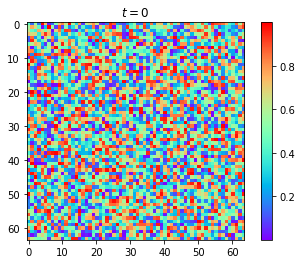

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.title("$t=0$")
plt.imshow(force[1:-1,1:-1], interpolation='nearest', cmap=plt.cm.rainbow)
plt.colorbar()
plt.savefig("reticoloFC1_02_1M.png", dpi=72 )
plt.show()
        

In [ ]:
#velocizzato
iterate=0
#forcenode1[iterate]=force[10,50]
#forcenode2[iterate]=force[11,50]
forcenode3[iterate]=force[10,51]

while(iterate < n_iter): #iterazioni
           
    move=np.zeros([N+2,N+2])  #reset ogni volta, cornice vuota attorno al reticolo per evitare errori out of bound durante la redistibuzione
    #scansione reticolare per indicare quali nodi devono essere ridistribuiti e azzerati
    for i in range(1,N+1):
        for j in range(1,N+1):
            if force[i,j]>=f_thresh: # se vero il nodo è instabile
                #alpha=np.random.uniform(0.10,0.20)
                move[i,j]-=force[i,j] #equazione resettare
                move[i+dx[:],j+dy[:]]+=alpha*force[i,j] #equazione sostituire
                toppling[iterate]+=1 #toppling cumulato (energia accumulata)
                forcediss[iterate]+=(1-4*alpha)*force[i,j]
    
    if iterate%10000==0:
        print("{0},toppl {1}.".format(iterate,toppling[iterate]))
        #fig = plt.figure()
        #ax = fig.add_subplot(1,1,1)
        #ax.set_aspect('equal')
        #plt.imshow(force[1:-1,1:-1], interpolation='nearest', cmap=plt.cm.rainbow)
        #plt.colorbar()
        #plt.show()
        
    if toppling[iterate]>0: #se positiva allora inizia il terremoto
        force+=move #reticolo aggiornato
        iterate=iterate+1
        totalf[iterate]=force[1:-1,1:-1].sum()
        #forcenode1[iterate]=force[10,50]
        #forcenode2[iterate]=force[11,50]
        forcenode3[iterate]=force[10,51]
    else:
        passi=int((f_thresh-np.amax(force[1:-1,1:-1]))/delta_f)+1
        for k in range(0,passi):
            force[:,:]+=delta_f
            
            if iterate+k+1>=n_iter:
                break
            else:
                #forcenode1[iterate+k+1]=force[10,50]
                #forcenode2[iterate+k+1]=force[11,50]
                forcenode3[iterate+k+1]=force[10,51]
                totalf[iterate+k+1]=force[1:-1,1:-1].sum()
          
        #print("{0},toppl {1},totalf {2}.".format(iterate,toppling[iterate],totalf[iterate]))
        iterate=iterate+passi
      
    #forza totale su reticolo    
    
    #print("{0},toppl {1}.".format(iterate,toppling[iterate]))

0,toppl 0.
20000,toppl 1.
40000,toppl 1.
60000,toppl 0.
70000,toppl 1.
90000,toppl 2.
100000,toppl 2.
110000,toppl 1.
120000,toppl 1.


In [59]:
out_file = open("vicini1.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,forcenode1[iterate]))

out_file.close()

out_file = open("vicini2.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,forcenode2[iterate]))

out_file.close()

out_file = open("vicini3.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,forcenode3[iterate]))

out_file.close()


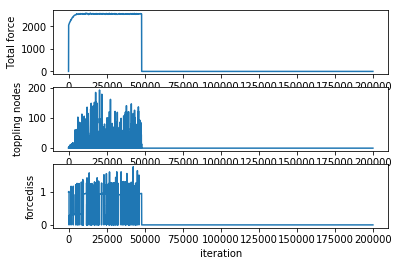

In [7]:
plt.subplot(3,1,1)
plt.plot(totalf)
plt.ylabel("Total force")
plt.subplot(3,1,2)
plt.plot(toppling)
plt.xlabel("iteration")
plt.ylabel("toppling nodes")
plt.subplot(3,1,3)
plt.plot(forcenode3)
plt.xlabel("iteration")
plt.ylabel("forcediss")
plt.show()

In [15]:
out_file = open("reticolo16_forza5M.txt","w")

for i in range(1,N):
    for j in range(1,N):
        out_file.write("{1} ".format(j,force[i][j]))
    out_file.write("\r")
    

out_file.close()

In [5]:
np.amax(totalf)

10962

In [85]:
out_file = open("totalf64025.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,totalf[iterate]))

out_file.close()

In [6]:
np.where(totalf==np.amax(totalf))

(array([19187, 19188]),)

out_file = open("node12mil_015.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,forcenode1[iterate]))

out_file.close()

out_file = open("node22mil_015.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,forcenode2[iterate]))

out_file.close()

out_file = open("node32mil_015.txt","w")

for iterate in range(0,n_iter):
    out_file.write("{1}\r".format(iterate,forcenode3[iterate]))

out_file.close()


4) se alpha non è costante ? non è neanche periodica la situazione?

5) costruisci la correlazione tra E (la dimensione dei terremoti) e T (la durata) e fallo per 3 alfa differenti

In [19]:
def dettagli_terremoto(n_iter,toppling): #funzione che restituisce l'energia , il picco 
   
    n_max_av=1000000 #massimo numero di valanghe
    t_av=np.zeros(n_max_av) #durata della valanga, il numero di iterazioni trascorse da inizio di uuna valanga all'ultima ridistribuzione
    istart,n_av,nodi=0,-1,0
    noditot=np.zeros(n_max_av)
    
    for iterate in range(1,n_iter): #devo trovare quando inizia la valanga e inizia quando la sabbia spostata è maggiore di zero
        if toppling[iterate]>0 and toppling[iterate-1]==0: #ovviamento al passaggio precedente non ci deve essere spostamento
            nodi=0#finisce la valanga a iterate-1 se tsav(iterate-1)>0 e tsav(iterate)=0
            istart=iterate
            if n_av==n_max_av-1: #test di salvezza
                print("troppe valanghe")
                break
            n_av+=1
        nodi+=toppling[iterate]
        if toppling[iterate]<=0 and toppling[iterate-1]>0:
            t_av[n_av]=iterate-istart
            noditot[n_av]=nodi
                
    return n_av,t_av,noditot

In [16]:
n_av,t_av,noditot=dettagli_terremoto(n_iter,toppling)

In [17]:
n_av

2765

In [50]:
out_file = open("E015_2m.txt","w")

for iterate in range(0,n_av):
    out_file.write("{1}\r".format(iterate,noditot[iterate]))

out_file.close()

# ArrayPlot

In [46]:
del toppling
del force

In [14]:
N=64 # dimensione del reticolo (bidimensionale)
f_thresh=5. #soglia della forza
delta_f=1.e-4 #ampiezza della forza
alpha=0.25 #parametro di conservazione
n_iter=200000 #numero iterazioni

dx=np.array([-1,0,1,0])  #array x
dy=np.array([0,-1,0,1])   #array y : servono per definire i vicini 
force=np.zeros([N+2,N+2])
toppling=np.zeros(n_iter,dtype="int")#rovesciamento serie temporale 
#forcediss=np.zeros(n_iter)
#totalf=np.zeros(n_iter,dtype="int")#forza totale serie temporale

#forcenode1=np.zeros(n_iter)
#forcenode2=np.zeros(n_iter)
#forcenode3=np.zeros(n_iter)
for i in range(1,N+1):
    for j in range(1,N+1):
        force[i,j]=f_thresh*(np.random.uniform())


In [15]:
#velocizzato
iterate=0


while(iterate < n_iter): #iterazioni
           
    move=np.zeros([N+2,N+2])  #reset ogni volta, cornice vuota attorno al reticolo per evitare errori out of bound durante la redistibuzione
    
    for i in range(1,N+1):
        for j in range(1,N+1):
            if force[i,j]>=f_thresh: # se vero il nodo è instabile
               
                move[i,j]-=force[i,j] #equazione resettare
                move[i+dx[:],j+dy[:]]+=alpha*force[i,j] #equazione sostituire
                toppling[iterate]+=1 #toppling cumulato (energia accumulata)
               
    if iterate%10000==0:
        print("{0},toppl {1}.".format(iterate,toppling[iterate]))
    
    if toppling[iterate]>0: #se positiva allora inizia il terremoto
        force+=move #reticolo aggiornato
        iterate=iterate+1
    else:
        passi=int((f_thresh-np.amax(force[1:-1,1:-1]))/delta_f)+1
        force[:,:]+=passi*delta_f
        iterate=iterate+passi

0,toppl 0.
10000,toppl 11.
20000,toppl 2.
30000,toppl 2.
40000,toppl 9.
80000,toppl 1.
90000,toppl 9.
100000,toppl 4.
110000,toppl 36.
120000,toppl 12.
130000,toppl 15.
150000,toppl 14.
160000,toppl 1.
170000,toppl 25.
180000,toppl 17.
190000,toppl 2.


In [16]:
n_av,t_av,noditot=dettagli_terremoto(n_iter,toppling)

n_av

4674

In [17]:
out_file = open("E025_2m.txt","w")

for iterate in range(0,n_av):
    out_file.write("{1}\r".format(iterate,noditot[iterate]))

out_file.close()

In [18]:
out_file = open("T025_2m.txt","w")

for iterate in range(0,n_av):
    out_file.write("{1}\r".format(iterate,t_av[iterate]))

out_file.close()